# Tesla (TSLA) Stock Price prediction using Facebook Prophet 

In [ ]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [ ]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [3]:
import pandas as pd
import plotly.express as px
from fbprophet import Prophet


In [4]:
 #Initializing Plotly
 import plotly.io as pio
 pio.renderers.default='colab'

## Importing the Dataset & Exploring it

In [5]:
df = pd.read_csv("TSLA.csv")

In [ ]:
#read_csv function from pandas

In [6]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-16,93.900002,98.973999,88.433998,89.014000,89.014000,102447500
1,2020-03-17,88.001999,94.370003,79.199997,86.040001,86.040001,119973000
2,2020-03-18,77.800003,80.972000,70.101997,72.244003,72.244003,118931000
3,2020-03-19,74.940002,90.400002,71.692001,85.528000,85.528000,150977500
4,2020-03-20,87.639999,95.400002,85.157997,85.505997,85.505997,141427500
...,...,...,...,...,...,...,...
246,2021-03-08,600.549988,620.130005,558.789978,563.000000,563.000000,51787000
247,2021-03-09,608.179993,678.090027,595.210022,673.580017,673.580017,67523300
248,2021-03-10,700.299988,717.849976,655.059998,668.059998,668.059998,60605700
249,2021-03-11,699.400024,702.500000,677.179993,699.599976,699.599976,36253900


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [9]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,414.739109,425.323268,402.764717,415.137952,415.137952,6.178552e+07
std,234.908560,239.374833,229.101662,234.987820,234.987820,3.306128e+07
min,74.940002,80.972000,70.101997,72.244003,72.244003,1.515770e+07
25%,194.901001,199.384003,188.566994,193.368995,193.368995,3.628290e+07
50%,408.951996,418.700012,401.660004,408.500000,408.500000,5.561600e+07
75%,606.549988,627.795013,586.750000,607.234985,607.234985,8.131825e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,2.221262e+08


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [ ]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [10]:
px.area(df, x="Date", y="Close")

In [12]:
px.line(df, x="Date", y="Close")

In [13]:
px.area(df, x="Date", y="Volume")

In [14]:
px.bar(df, x="Date", y="Volume")

In [16]:
px.box(df, y="Close")

# Understanding Facebook Prophet

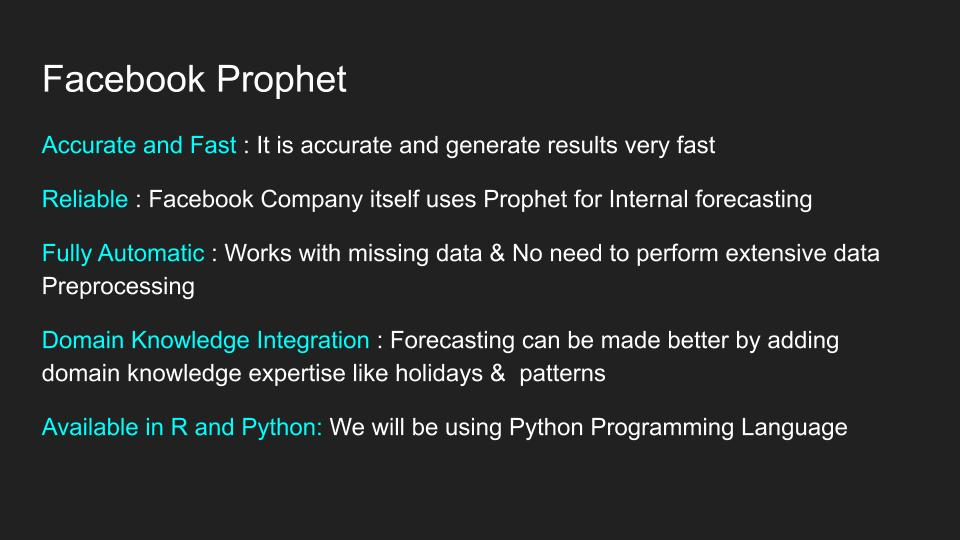

## Data Preperation

In [17]:
columns=['Date', "Close"]
ndf= pd.DataFrame(df, columns=columns)

In [19]:
  ndf


,Date,Close
0,2020-03-16,89.014000
1,2020-03-17,86.040001
2,2020-03-18,72.244003
3,2020-03-19,85.528000
4,2020-03-20,85.505997
...,...,...
246,2021-03-08,563.000000
247,2021-03-09,673.580017
248,2021-03-10,668.059998
249,2021-03-11,699.599976


In [20]:
prophet_df = ndf.rename(columns={'Date':'ds', "Close":'y'})

In [21]:
prophet_df

,ds,y
0,2020-03-16,89.014000
1,2020-03-17,86.040001
2,2020-03-18,72.244003
3,2020-03-19,85.528000
4,2020-03-20,85.505997
...,...,...
246,2021-03-08,563.000000
247,2021-03-09,673.580017
248,2021-03-10,668.059998
249,2021-03-11,699.599976


## Creating Facebook Prophet Model

In [23]:
m = Prophet()
m.fit(prophet_df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##Forecasting

In [24]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

In [25]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-16,65.535181,-32.548721,146.285649,65.535181,65.535181,-5.874279,-5.874279,-5.874279,-5.874279,-5.874279,-5.874279,0.0,0.0,0.0,59.660903
1,2020-03-17,67.330702,-21.517698,155.360523,67.330702,67.330702,-2.414034,-2.414034,-2.414034,-2.414034,-2.414034,-2.414034,0.0,0.0,0.0,64.916667
2,2020-03-18,69.126222,-13.039580,147.802353,69.126222,69.126222,-3.507490,-3.507490,-3.507490,-3.507490,-3.507490,-3.507490,0.0,0.0,0.0,65.618732
3,2020-03-19,70.921742,-17.351207,156.047279,70.921742,70.921742,-3.855635,-3.855635,-3.855635,-3.855635,-3.855635,-3.855635,0.0,0.0,0.0,67.066107
4,2020-03-20,72.717262,-24.701570,152.101955,72.717262,72.717262,-7.761385,-7.761385,-7.761385,-7.761385,-7.761385,-7.761385,0.0,0.0,0.0,64.955877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,2021-04-07,900.335687,808.670650,973.844233,899.076277,901.414404,-3.507490,-3.507490,-3.507490,-3.507490,-3.507490,-3.507490,0.0,0.0,0.0,896.828198
277,2021-04-08,902.793204,810.640909,987.269281,901.467255,903.925870,-3.855635,-3.855635,-3.855635,-3.855635,-3.855635,-3.855635,0.0,0.0,0.0,898.937569
278,2021-04-09,905.250720,805.976877,983.299618,903.852529,906.450369,-7.761385,-7.761385,-7.761385,-7.761385,-7.761385,-7.761385,0.0,0.0,0.0,897.489335
279,2021-04-10,907.708236,839.198710,1001.836647,906.219075,908.981199,11.706412,11.706412,11.706412,11.706412,11.706412,11.706412,0.0,0.0,0.0,919.414648


In [26]:
px.line(forecast, x='ds', y='yhat')

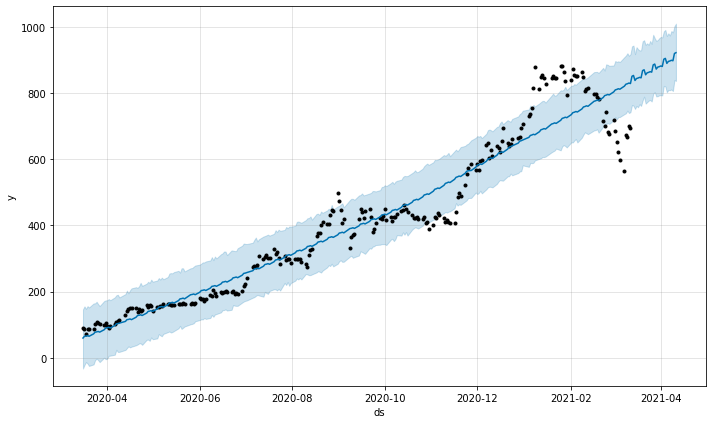

In [27]:
figure = m.plot(forecast, xlabel='ds', ylabel='y')

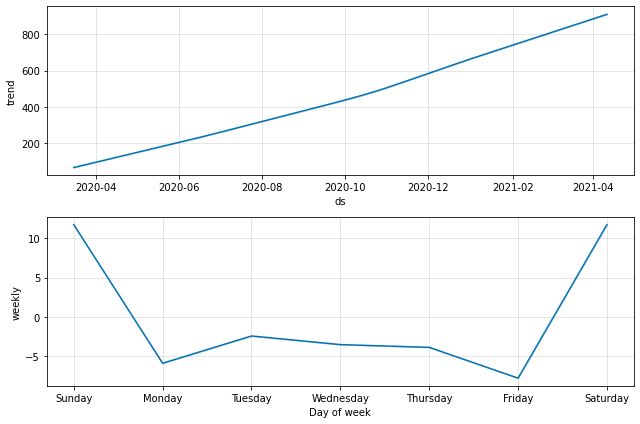

In [28]:
figure2 = m.plot_components(forecast)

##Downloading the Forecast data

In [30]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>